In [3]:
import numpy as np
from navier_stokes.fdm_fvm_functions import GaussionInitialize, SinusoidalInitialize, FDMMethod, FVMMethod, EulerIntegrator, RK2Integrator, RK4Integrator
from navier_stokes.plotting import plot_results, plot_kinetic_energy

NameError: name 'NDArray' is not defined

Comparison between FVMMethod and FDMMethod (EulerIntegrator, nt = 5)

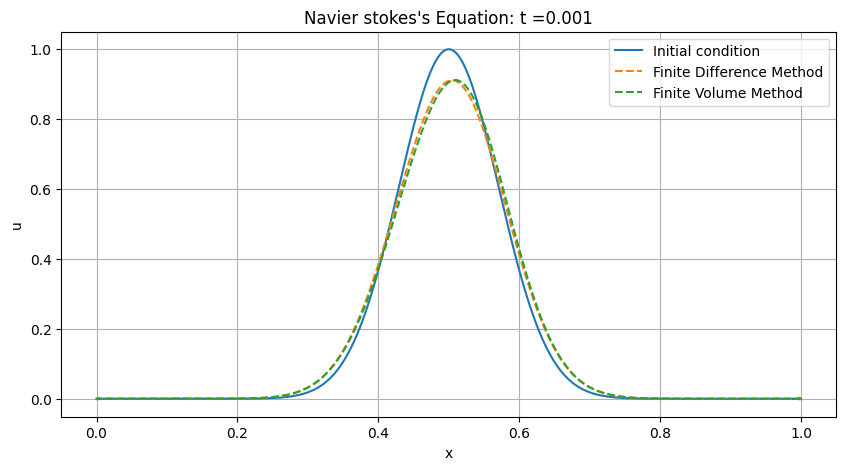

In [ ]:
# Problem inputs
## Set the basic parameter
nx = 1000            # Number of spatial points
L = 1.0             # Length of the domain
dt = 0.001           # Time step size
nt = 5              # Time steps
tlim = dt * nt      # End time for simulation
nu = 0.1            # Viscosity

## Set the initial condition
dx = L / (nx - 1)
x, u_initial, dx = GaussionInitialize().initialize(nx, L)

u_final_fdm = EulerIntegrator().integrate(GaussionInitialize(), FDMMethod(), nx, L, nu, nt)
u_final_fvm = EulerIntegrator().integrate(GaussionInitialize(), FVMMethod(), nx, L, nu, nt)

# Plot the results
plot_results(x, u_initial, [u_final_fdm, u_final_fvm], 
             labels=['Finite Difference Method','Finite Volume Method'], 
             title=f'Navier stokes\'s Equation: t ={dt}')

Evolution of the wave as time increases from 0 to 0.005 (FVM, EulerIntegrator)

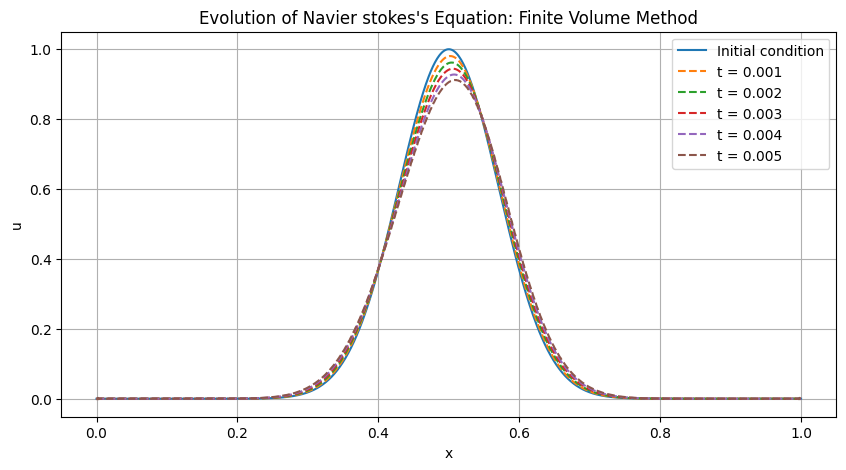

In [6]:
# Problem inputs
## Set the basic parameter
nx = 1000            # Number of spatial points
L = 1.0             # Length of the domain
dt = 0.001           # Time step size
nu = 0.1            # Viscosity

## Set the initial condition
dx = L / (nx - 1)
x, u_initial, dx = GaussionInitialize().initialize(nx, L)

u_final_1 = EulerIntegrator().integrate(GaussionInitialize(), FVMMethod(), nx, L, nu, 1)
u_final_2 = EulerIntegrator().integrate(GaussionInitialize(), FVMMethod(), nx, L, nu, 2)
u_final_3 = EulerIntegrator().integrate(GaussionInitialize(), FVMMethod(), nx, L, nu, 3)
u_final_4 = EulerIntegrator().integrate(GaussionInitialize(), FVMMethod(), nx, L, nu, 4)
u_final_5 = EulerIntegrator().integrate(GaussionInitialize(), FVMMethod(), nx, L, nu, 5)

# Plot the initial and final solutions
plot_results(x, u_initial, [u_final_1, u_final_2, u_final_3, u_final_4, u_final_5], 
             labels=['t = 0.001','t = 0.002','t = 0.003','t = 0.004','t = 0.005'], 
             title='Evolution of Navier stokes\'s Equation: Finite Volume Method')

Comparison between different integrators (FVM, nt = 2)

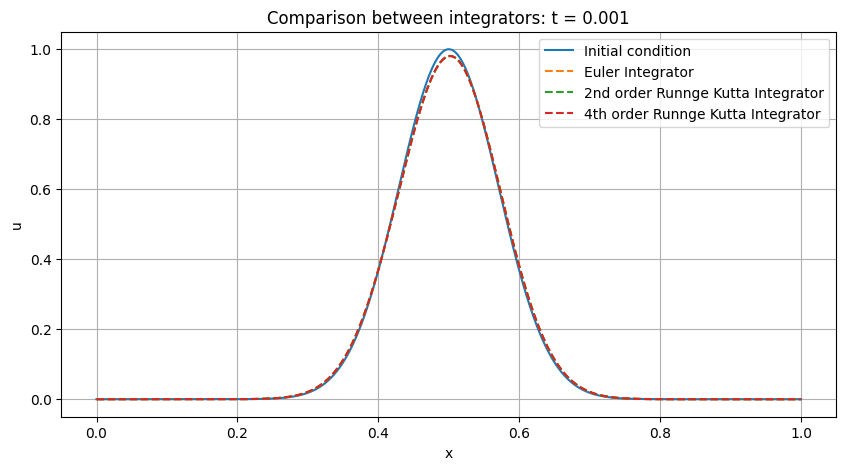

In [9]:
# Problem inputs
## Set the basic parameter
nx = 1000            # Number of spatial points
L = 1.0             # Length of the domain
dt = 0.001           # Time step size
nt = 1              # Time steps
tlim = dt * nt      # End time for simulation
nu = 0.1            # Viscosity

## Set the initial condition
dx = L / (nx - 1)
x, u_initial, dx = GaussionInitialize().initialize(nx, L)

u_final_euler = EulerIntegrator().integrate(GaussionInitialize(), FVMMethod(), nx, L, nu, nt)
u_final_rk2 = RK2Integrator().integrate(GaussionInitialize(), FVMMethod(), nx, L, nu, nt)
u_final_rk4 = RK4Integrator().integrate(GaussionInitialize(), FVMMethod(), nx, L, nu, nt)

# Plot the initial and final solutions
plot_results(x, u_initial, [u_final_euler, u_final_rk2, u_final_rk4], 
             labels=['Euler Integrator', '2nd order Runnge Kutta Integrator', '4th order Runnge Kutta Integrator'], 
             title=f'Comparison between integrators: t = {dt}')

Evolution of Kinetic energy as time increases. (avg_ke = (0.5 * u ** 2) / nx)

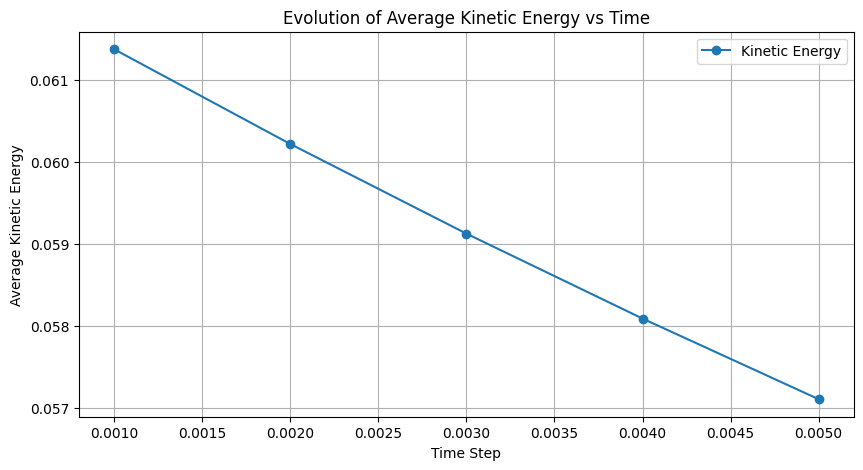

In [13]:
# Problem inputs
## Set the basic parameter
nx = 1000            # Number of spatial points
L = 1.0             # Length of the domain
dt = 0.001           # Time step size
nu = 0.1            # Viscosity

## Set the initial condition
dx = L / (nx - 1)
x, u_initial, dx = GaussionInitialize().initialize(nx, L)

# Calculate average kinetic energy
def cal_ke_avg(u: FArray, nx: int) -> float:
    energy_f = 0.5 * np.sum(u ** 2)
    return energy_f / nx

u_final_1 = EulerIntegrator().integrate(GaussionInitialize(), FVMMethod(), nx, L, nu, 1)
ke_1 = cal_ke_avg(u_final_1, nx)
u_final_2 = EulerIntegrator().integrate(GaussionInitialize(), FVMMethod(), nx, L, nu, 2)
ke_2 = cal_ke_avg(u_final_2, nx)
u_final_3 = EulerIntegrator().integrate(GaussionInitialize(), FVMMethod(), nx, L, nu, 3)
ke_3 = cal_ke_avg(u_final_3, nx)
u_final_4 = EulerIntegrator().integrate(GaussionInitialize(), FVMMethod(), nx, L, nu, 4)
ke_4 = cal_ke_avg(u_final_4, nx)
u_final_5 = EulerIntegrator().integrate(GaussionInitialize(), FVMMethod(), nx, L, nu, 5)
ke_5 = cal_ke_avg(u_final_5, nx)
time_values = 0.001 * np.array([1, 2, 3, 4, 5])
ke_values = [ke_1, ke_2, ke_3, ke_4, ke_5]

# Plot the results
plot_kinetic_energy(time_values, ke_values)

Evolution of the wave with sinusodal initial condition as time increases from 0 to 0.002 (FVM, EulerIntegrator)

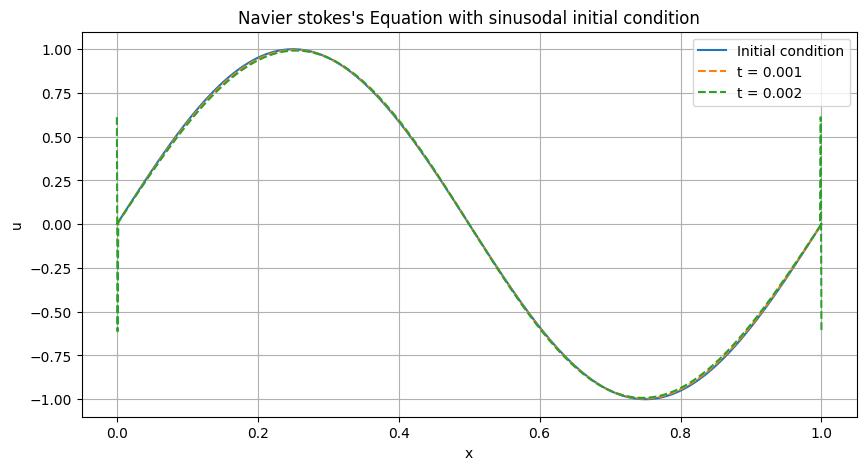

In [11]:
# Problem inputs
## Set the basic parameter
nx = 1000            # Number of spatial points
L = 1.0             # Length of the domain
dt = 0.001           # Time step size
nu = 0.1            # Viscosity

## Set the initial condition
dx = L / (nx - 1)
x, u_initial, dx = SinusoidalInitialize().initialize(nx, L)

u_final_1 = EulerIntegrator().integrate(SinusoidalInitialize(), FVMMethod(), nx, L, nu, 1)
u_final_2 = EulerIntegrator().integrate(SinusoidalInitialize(), FVMMethod(), nx, L, nu, 2)

# Plot the initial and final solutions
plot_results(x, u_initial, [u_final_1, u_final_2], 
             labels=['t = 0.001','t = 0.002'], 
             title='Navier stokes\'s Equation with sinusodal initial condition')